#  Comparison between lensed and unlensed BB spectrum

##### Check the difference between the lensed and unlensed C in presence of tensor modes, to see that B modes are dominated by lensing on small scales. Use r = 0.2 like in BICEP results! To fix this value of the tensor to scalar ratio, just add this line to your input file: r = 0.2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
from classy import Class


In [3]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [4]:
cosmo = Class()
cosmo.set({'output':'tCl,pCl,lCl','lensing':'yes','modes':'s,t','r':'0.2'})
cosmo.compute()

In [5]:
raw_cl = cosmo.raw_cl()
lensed_cl = cosmo.lensed_cl()
lr = raw_cl['ell']
factor_raw = lr*(lr+1)/(2*np.pi)
ll = lensed_cl['ell']
factor_lensed = ll*(ll+1)/(2*np.pi)
raw_cl.viewkeys()

dict_keys(['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te'])

Text(0,0.5,'$\\ell(\\ell+1)/(2\\pi) C_l^{BB}$')

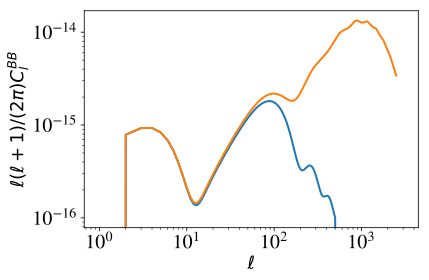

In [6]:
plt.loglog(lr,factor_raw*raw_cl['bb'],ll,factor_lensed*lensed_cl['bb'])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/(2\pi) C_l^{BB}$")
#ylim([1e-11, 1e-9])